In [1]:
import random
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import seaborn as sns
sns.set()
import pandas as pd
from sklearn.metrics import r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf


%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/anaconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [2]:
df = pd.read_csv('data/modeldf.csv')

In [3]:
df.head(1)

,num_reviews,been_sale,orig_price,num_tags,num_genres,year_released,languages_filled,Activision,BANDAI NAMCO Entertainment,Capcom,...,Software_genre,Game_genre,Utilities_genre,Feral_genre,Ltd_genre,Mac_genre,Design_genre,Illustration_genre,Sokpop_genre,Collective_genre
0,36837,0,59.99,20.0,3.0,2021,13.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.rating_val

0        6
1       10
2       10
3        9
4       10
        ..
5788     5
5789     5
5790     5
5791     6
5792     6
Name: rating_val, Length: 5793, dtype: int64

In [8]:
cols = list(df.columns)

In [9]:
cols.insert(0, cols.pop(cols.index('rating_val')))

In [10]:
df = df[cols]

In [12]:
df.head(1)

,rating_val,num_reviews,been_sale,orig_price,num_tags,num_genres,year_released,languages_filled,Activision,BANDAI NAMCO Entertainment,...,Software_genre,Game_genre,Utilities_genre,Feral_genre,Ltd_genre,Mac_genre,Design_genre,Illustration_genre,Sokpop_genre,Collective_genre
0,6,36837,0,59.99,20.0,3.0,2021,13.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
X, y = df.iloc[:,1:], df.iloc[:,0]

In [14]:
lr = LinearRegression()

In [15]:
lr.fit(X,y)

LinearRegression()

In [16]:
lr.score(X,y)

0.2056628092954993

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=7)

In [18]:
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

0.2145668286482476

In [19]:
lr.score(X_val,y_val)

0.17900894593385963

In [23]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

X_val_poly = poly.transform(X_val)

In [24]:
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly,y_train)
lr_poly.score(X_train_poly,y_train)

0.6082990308267957

In [25]:
lr_poly.score(X_val_poly,y_val)

-54.764213232875036

In [26]:
lr_poly.score(X_test_poly,y_test)

-50.82357006478372

In [27]:
lasso = LassoCV()
lasso.fit(X_train_poly,y_train)
lasso.score(X_train_poly,y_train)

0.01352507425250693

In [28]:
df = pd.read_csv('data/modeldf.csv')

In [29]:
df.head(1)

,num_reviews,been_sale,orig_price,num_tags,num_genres,year_released,languages_filled,Activision,BANDAI NAMCO Entertainment,Capcom,...,Software_genre,Game_genre,Utilities_genre,Feral_genre,Ltd_genre,Mac_genre,Design_genre,Illustration_genre,Sokpop_genre,Collective_genre
0,36837,0,59.99,20.0,3.0,2021,13.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
lasso = LassoCV

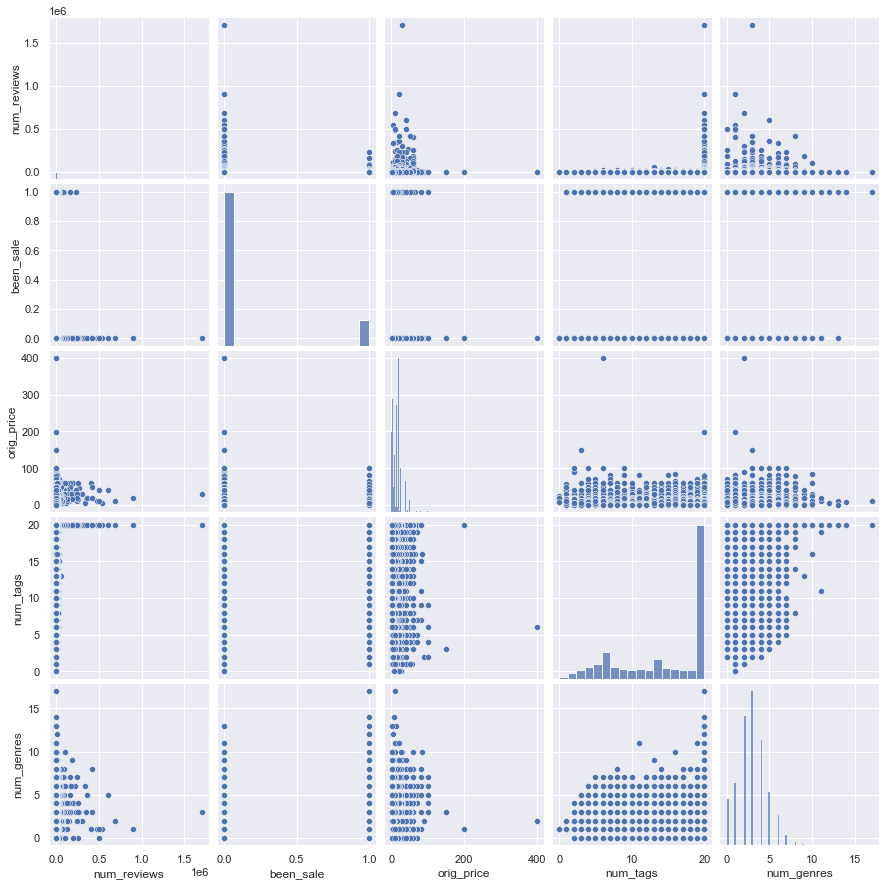

In [33]:
sns.pairplot(df.iloc[:,:5])